In [1]:
!pip install lightgbm==3.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.8 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEVX/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [3]:
import pandas as pd

station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEVX/input_files/LEVXY2018Y2022.csv",
                          usecols = ["time","visibility_o"],
                          parse_dates=["time"]).set_index("time")

station["visibility_o"].describe()

count    90008.000000
mean      8306.777209
std       3202.650054
min         48.000000
25%       8996.000000
50%       9994.000000
75%       9994.000000
max       9994.000000
Name: visibility_o, dtype: float64

In [4]:
station["visibility_o"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n))

visibility_o
9994.0    72%
7998.0     3%
8996.0     3%
7001.0     2%
6003.0     2%
         ... 
4297.0     0%
4603.0     0%
4892.0     0%
3895.0     0%
4699.0     0%
Name: proportion, Length: 63, dtype: object

**Station visibility to interval**

In [5]:
#visibility to interval
interval = pd.IntervalIndex.from_tuples([(-0.1,800), (800, 1500),(1500,3000),(3000,5000),(5000,100000)])
labels = ['800', '1500',"3000","5000","9999"]
station["vis_l"] = pd.cut(station["visibility_o"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

print(station.sample(20))
print("\nVisibility frequencies.")
station["vis_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n))

                     visibility_o vis_l
time                                   
2020-01-04 03:00:00         145.0   800
2020-12-03 18:30:00        8996.0  9999
2018-12-29 00:00:00        9994.0  9999
2020-05-04 13:00:00        7998.0  9999
2019-04-17 11:30:00        9994.0  9999
2021-10-10 07:00:00        9994.0  9999
2018-09-27 11:30:00        9994.0  9999
2018-08-10 22:00:00        9994.0  9999
2020-09-20 05:00:00        6003.0  9999
2020-02-21 16:30:00        9994.0  9999
2021-07-14 02:30:00        9994.0  9999
2018-10-22 03:00:00        9994.0  9999
2019-07-30 06:00:00        9994.0  9999
2018-10-25 15:00:00        9994.0  9999
2020-12-28 18:30:00        9994.0  9999
2022-11-05 18:00:00        9994.0  9999
2021-12-08 01:30:00        8996.0  9999
2018-06-09 18:30:00        6003.0  9999
2019-01-02 08:00:00         145.0   800
2021-09-22 05:30:00        9994.0  9999

Visibility frequencies.


vis_l
9999    84%
800      7%
3000     4%
1500     3%
5000     2%
nan      0%
Name: proportion, dtype: object

**Forecast**

In [6]:
#Forecast d
#Load
mody2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEVX/input_files/lat42.22lon-8.63p2R1KmD0Y2018.csv",parse_dates=["time"])
mody2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEVX/input_files/lat42.22lon-8.63p2R1KmD0Y2019.csv",parse_dates=["time"])
mody2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEVX/input_files/lat42.22lon-8.63p2R1KmD0Y2020.csv",parse_dates=["time"])
mody2021 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEVX/input_files/lat42.22lon-8.63p2R1KmD0Y2021.csv",parse_dates=["time"])
mody2022 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEVX/input_files/lat42.22lon-8.63p2R1KmD0Y2022.csv",parse_dates=["time"])
model1k = pd.concat([mody2018,mody2019,mody2020,mody2021,mody2022]).drop(columns=["Unnamed: 0"]).set_index("time")

model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,194.487213,4.700000e-12,902.739380,2.913697,8.417547,103084.335938,281.546753,0.909289,24077.052734,7.025198,...,23.129999,-15.010574,0.141546,0.000000,0.0,0.141546,5590.513672,1558.336060,250.594376,273.468506
2018-01-01 02:00:00,188.501129,0.000000e+00,932.149353,2.754451,9.908416,103076.046875,281.170319,0.941909,24059.664062,2.625070,...,23.860001,-20.136265,0.100000,0.000000,0.0,0.100000,5598.377441,1556.657349,251.014557,273.805298
2018-01-01 03:00:00,179.663055,0.000000e+00,921.418823,2.745423,4.196273,103044.367188,281.068939,0.991956,24047.859375,-3.092078,...,57.099998,-15.279875,0.300000,0.300000,0.0,0.300000,5604.513672,1557.682495,251.309189,273.476990
2018-01-01 04:00:00,188.336029,0.000000e+00,946.878601,2.701216,11.246392,103070.609375,282.164124,0.948673,24043.777344,2.592772,...,38.160000,-14.909769,0.200000,0.500000,0.0,0.500000,5611.291992,1557.819946,251.368500,273.654633
2018-01-01 05:00:00,211.158997,0.000000e+00,1017.428345,3.090386,10.534806,103014.820312,282.710999,0.937205,24045.267578,5.421835,...,71.970001,-6.809992,0.400000,0.000000,0.0,0.400000,5613.609863,1563.999146,251.327194,274.155701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,191.491928,0.000000e+00,1697.610596,5.745477,10.133011,101591.250000,285.080414,0.870675,6834.445312,45.764011,...,0.000000,0.000059,0.300000,0.453125,0.6,0.600000,5555.967773,1470.706909,255.142441,277.483307
2022-12-31 20:00:00,184.279907,0.000000e+00,1743.129517,5.224817,7.311884,101641.453125,284.715393,0.934070,24039.119141,21.532307,...,0.000000,0.000277,0.400000,0.261678,0.7,0.700000,5560.480957,1475.268555,254.995316,277.776245
2022-12-31 21:00:00,179.225891,0.000000e+00,1642.471558,4.232030,6.122677,101733.875000,284.775787,0.961509,7237.049316,10.381554,...,51.000000,-0.765418,0.400000,0.335472,0.5,0.500000,5562.308105,1480.039551,255.206436,276.828552


**Label meteorological model visibility. Concatenate Station and meteorological model. Few discrepancies between Station (half hours) and Station (only 0 o'clock hours). Less visibilty in half hours**  

In [7]:
#label meteorological model visbility points 0 and 1
model1k["visibility0_l"] = pd.cut(model1k["visibility0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model1k["visibility1_l"] = pd.cut(model1k["visibility1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

#concat station model
df_all1k = pd.concat([station,model1k],axis=1).dropna()
df_all1k = df_all1k.drop(columns=["visibility_o"])

#meteorological model frequencies
print("Meteorological model point 0")
print(df_all1k["visibility0_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n)))
print("\nMeteorological model point 1")
print(df_all1k["visibility1_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n)))

#Station frequencies
print("\nActual visibility frequencies o'clock hours")
df_all1k["vis_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n))

Meteorological model point 0
visibility0_l
9999    95%
800      4%
5000     1%
1500     0%
3000     0%
Name: proportion, dtype: object

Meteorological model point 1
visibility1_l
9999    93%
800      5%
5000     1%
1500     1%
3000     0%
Name: proportion, dtype: object

Actual visibility frequencies o'clock hours


vis_l
9999    86%
800      7%
3000     3%
1500     2%
5000     1%
Name: proportion, dtype: object

**Scatter plot significant meteorological variables and vis_l**

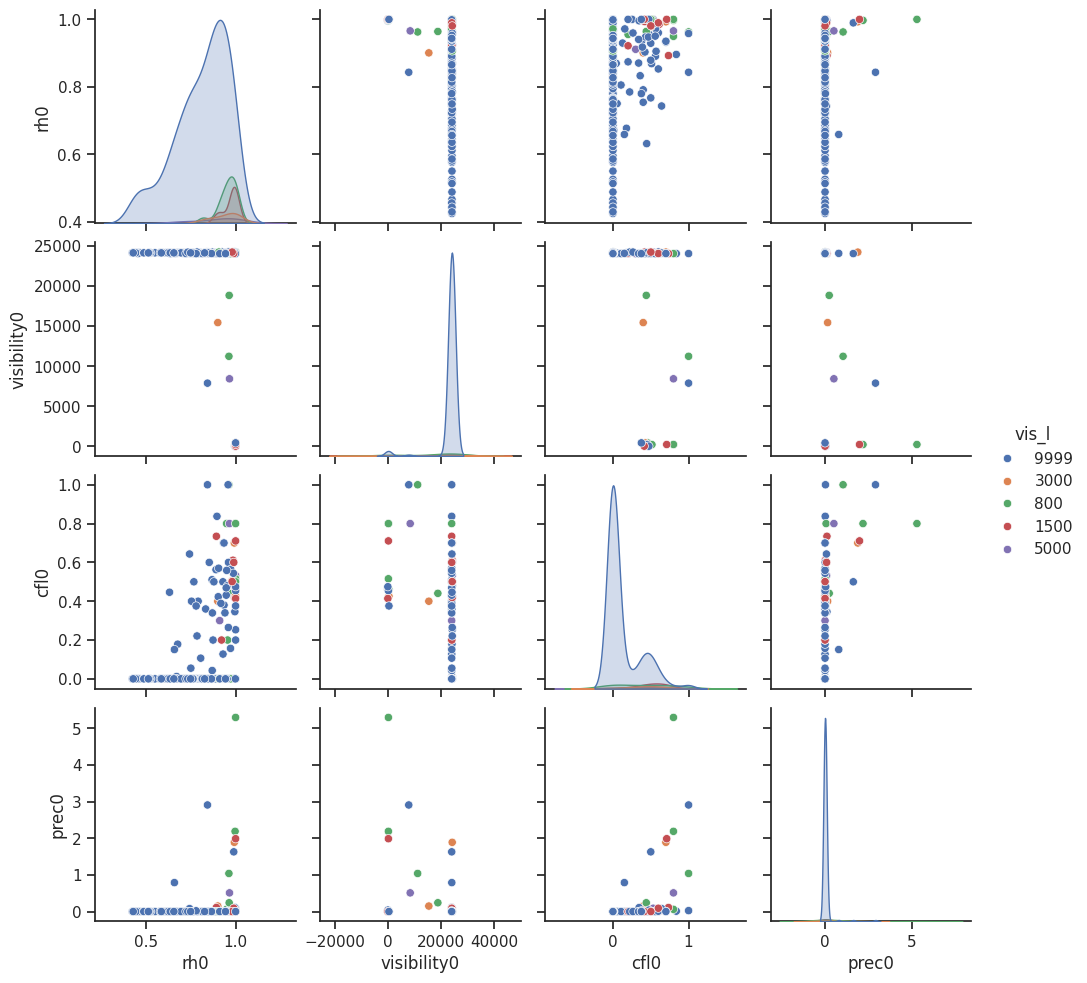

In [8]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["vis_l","rh0","visibility0","cfl0","prec0"]].sample(200), hue="vis_l");

**Scatter plot 3 PCA variables and vis_l**

In [9]:
df_all1k.iloc[:,1:-2].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501'],
      dtype='object')

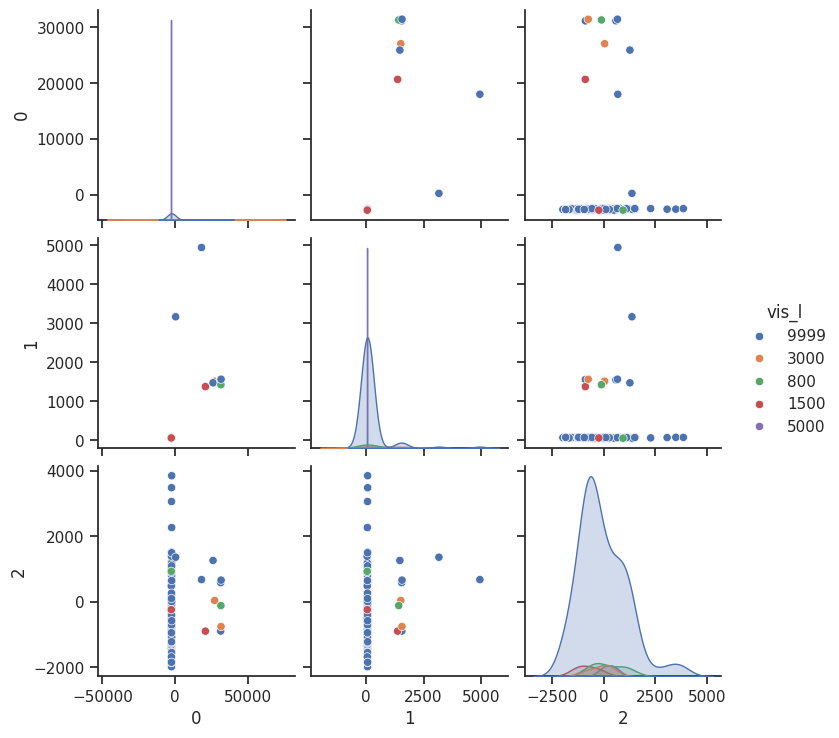

In [10]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:-2]),
                                                        index =df_all1k.index)
df_pca["vis_l"] = df_all1k.vis_l
sns.pairplot(df_pca.sample(100), hue="vis_l");

**Meteorological model score accuracy**

In [11]:
from sklearn.metrics import classification_report

# HSS point 0
print("\nConfusion matrix point 0")
cm = pd.crosstab(df_all1k.vis_l,df_all1k.visibility0_l ,margins=True,)
print(cm)


print("\nQuality report Meteorological model point 0")
print(pd.DataFrame(classification_report(df_all1k.vis_l,df_all1k.visibility0_l,output_dict=True)).T)

# HSS point 1
print("\nConfusion matrix point 1")
cm = pd.crosstab(df_all1k.vis_l,df_all1k.visibility1_l ,margins=True,)
print(cm)


print("\nQuality report Meteorological model point 1")
print(pd.DataFrame(classification_report(df_all1k.vis_l,df_all1k.visibility1_l,output_dict=True)).T)


Confusion matrix point 0
visibility0_l  1500  3000  5000   800   9999    All
vis_l                                              
1500             17    14    20   181    769   1001
3000             19    23    46   149   1101   1338
5000              7     2    10    45    536    600
800              55    32    39   626   2130   2882
9999             71    76   127   663  34606  35543
All             169   147   242  1664  39142  41364

Quality report Meteorological model point 0
              precision    recall  f1-score       support
1500           0.100592  0.016983  0.029060   1001.000000
3000           0.156463  0.017190  0.030976   1338.000000
5000           0.041322  0.016667  0.023753    600.000000
800            0.376202  0.217210  0.275407   2882.000000
9999           0.884114  0.973638  0.926719  35543.000000
accuracy       0.852964  0.852964  0.852964      0.852964
macro avg      0.311739  0.248337  0.257183  41364.000000
weighted avg   0.794002  0.852964  0.817544  4136

**Test association between observed variable and machine learning forecast (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [12]:
from scipy.stats import chi2_contingency

#only cm point 1 similar point 0

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(cm.iloc[0:5,0:5])

#degrees of freedoom (rows-1)*(columns-1) to test association between two variables
alpha = 0.01
print('\np-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Statistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between metmodel forecast and observed values")
else:
    print("Retain H0,There is no association between metmodel forecast and observed values")


p-value: 0.0
Significance level: 0.01
Degres of of freedom:  16
Statistic 4987.585144427626
Reject H0,There is an association between metmodel forecast and observed values


In [13]:
df_all1k = df_all1k.drop(columns=["visibility0_l","visibility1_l"])
df_all1k

,vis_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,9999,194.487213,4.700000e-12,902.739380,2.913697,8.417547,103084.335938,281.546753,0.909289,24077.052734,...,23.129999,-15.010574,0.141546,0.000000,0.0,0.141546,5590.513672,1558.336060,250.594376,273.468506
2018-01-01 02:00:00,9999,188.501129,0.000000e+00,932.149353,2.754451,9.908416,103076.046875,281.170319,0.941909,24059.664062,...,23.860001,-20.136265,0.100000,0.000000,0.0,0.100000,5598.377441,1556.657349,251.014557,273.805298
2018-01-01 03:00:00,9999,179.663055,0.000000e+00,921.418823,2.745423,4.196273,103044.367188,281.068939,0.991956,24047.859375,...,57.099998,-15.279875,0.300000,0.300000,0.0,0.300000,5604.513672,1557.682495,251.309189,273.476990
2018-01-01 04:00:00,9999,188.336029,0.000000e+00,946.878601,2.701216,11.246392,103070.609375,282.164124,0.948673,24043.777344,...,38.160000,-14.909769,0.200000,0.500000,0.0,0.500000,5611.291992,1557.819946,251.368500,273.654633
2018-01-01 05:00:00,9999,211.158997,0.000000e+00,1017.428345,3.090386,10.534806,103014.820312,282.710999,0.937205,24045.267578,...,71.970001,-6.809992,0.400000,0.000000,0.0,0.400000,5613.609863,1563.999146,251.327194,274.155701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 19:00:00,9999,197.595871,0.000000e+00,1995.864990,11.100198,18.938650,101692.445312,287.660614,0.935921,19832.320312,...,27.980000,-0.210500,0.100000,0.765625,0.3,0.765625,5612.094238,1493.944946,256.804199,280.074890
2022-12-30 20:00:00,9999,195.637833,0.000000e+00,1991.257568,11.492834,19.293737,101713.359375,287.651611,0.931984,24232.105469,...,29.920000,-0.436152,0.100000,0.750000,0.1,0.750000,5616.190918,1496.136475,257.134003,279.967987
2022-12-30 21:00:00,9999,192.479736,0.000000e+00,1978.222412,11.132333,18.849682,101740.812500,287.520111,0.934648,24232.353516,...,32.889999,-0.463516,0.200000,0.609375,0.0,0.609375,5618.303223,1496.986084,257.348755,279.805054


**Machine learning**

In [14]:
#x variables
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501'],
      dtype='object')

**ML LGBMClassifier**

In [15]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.vis_l
X = df_all1k.iloc[:,1:]

# loop random seed(1)
np.random.seed(1)
HSS_ml = []

for t in range (0,3):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #ml model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  #ml_model = BernoulliNB().fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion matrix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)


  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)






Confusion matrix  (Machine Learning)

col_0  1500  3000  5000  800  9999   All
vis_l                                   
1500     39    27     3   51    95   215
3000     26    42    11   48   129   256
5000      8    21    15   14    75   133
800      41    39     6  295   208   589
9999     73   139    74  253  6541  7080
All     187   268   109  661  7048  8273

Quality report (Machine Learning)

              precision    recall  f1-score      support
1500           0.208556  0.181395  0.194030   215.000000
3000           0.156716  0.164062  0.160305   256.000000
5000           0.137615  0.112782  0.123967   133.000000
800            0.446293  0.500849  0.472000   589.000000
9999           0.928065  0.923870  0.925963  7080.000000
accuracy       0.837906  0.837906  0.837906     0.837906
macro avg      0.375449  0.376592  0.375253  8273.000000
weighted avg   0.838490  0.837906  0.838035  8273.000000

Confusion matrix  (Machine Learning)

col_0  1500  3000  5000  800  9999   All
vis_

**Add time features**

In [16]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.isocalendar().week.astype(int)

# variables X
df_all1k.iloc[:,1:].columns


Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'hour', 'month', 'dayofyear',
       'weekofyear'],
      dtype='object')

**LGBMClassifier with time variables**

In [17]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.vis_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)

for t in range (0,3):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)




Confusion marix  (Machine Learning)

col_0  1500  3000  5000  800  9999   All
vis_l                                   
1500     36    30     3   53    93   215
3000     19    46    10   55   126   256
5000      9    24    16   10    74   133
800      43    38     3  310   195   589
9999     54   133    56  213  6624  7080
All     161   271    88  641  7112  8273

Quality report (Machine Learning)

              precision    recall  f1-score      support
1500           0.223602  0.167442  0.191489   215.000000
3000           0.169742  0.179688  0.174573   256.000000
5000           0.181818  0.120301  0.144796   133.000000
800            0.483619  0.526316  0.504065   589.000000
9999           0.931384  0.935593  0.933484  7080.000000
accuracy       0.849994  0.849994  0.849994     0.849994
macro avg      0.398033  0.385868  0.389681  8273.000000
weighted avg   0.845492  0.849994  0.847465  8273.000000

Confusion marix  (Machine Learning)

col_0  1500  3000  5000  800  9999   All
vis_l 

In [18]:
feature_importances = ml_model.feature_importances_
total_sum = sum(feature_importances)
feature_importances_perc = [(importance/total_sum)*100 for importance in feature_importances]
# Print the feature importances as a percentage of total feature importance

for name, importance in zip(X.columns, feature_importances_perc):
    print(f"{name}: {importance:.1f}%")

dir0: 2.7%
snow_prec0: 0.3%
snowlevel0: 2.6%
mod0: 1.2%
wind_gust0: 1.2%
mslp0: 3.2%
temp0: 1.5%
rh0: 1.9%
visibility0: 4.4%
lhflx0: 2.2%
lwflx0: 1.7%
conv_prec0: 0.0%
prec0: 2.3%
swflx0: 1.5%
shflx0: 2.0%
cape0: 1.6%
cin0: 2.5%
cfh0: 2.0%
cfl0: 1.6%
cfm0: 1.5%
cft0: 1.5%
HGT5000: 2.1%
HGT8500: 2.3%
T5000: 1.9%
T8500: 2.1%
dir1: 2.7%
snow_prec1: 0.4%
snowlevel1: 2.3%
mod1: 1.2%
wind_gust1: 1.1%
mslp1: 2.8%
temp1: 1.6%
rh1: 1.8%
visibility1: 4.2%
lhflx1: 1.2%
lwflx1: 1.6%
conv_prec1: 0.0%
prec1: 2.0%
swflx1: 1.4%
shflx1: 1.8%
cape1: 1.6%
cin1: 2.5%
cfh1: 1.9%
cfl1: 1.5%
cfm1: 1.4%
cft1: 1.5%
HGT5001: 1.6%
HGT8501: 2.0%
T5001: 1.6%
T8501: 2.0%
hour: 2.6%
month: 1.4%
dayofyear: 3.6%
weekofyear: 1.4%


In [19]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/airport_ml/LEVX/algorithms/llmvis_LEVX_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])
